In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os

In [3]:
from google.colab import files
uploaded = files.upload()

Saving archive (2).zip to archive (2).zip


In [6]:
import zipfile

with zipfile.ZipFile("archive (2).zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

In [7]:
import os
os.listdir("dataset")

['data.csv']

In [8]:
import pandas as pd

data = pd.read_csv("dataset/data.csv", encoding="latin1")
data.head(10)

/tmp/ipython-input-273700037.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("dataset/data.csv", encoding="latin1")


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152.0,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151.0,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


In [9]:
x = data['no2'].dropna()
x = x.values

In [10]:
import numpy as np

a_r = 0.15
b_r = 0.3

z = x + a_r * np.sin(b_r * x)


In [11]:
mu = np.mean(z)


In [12]:
sigma2 = np.var(z)
lam = 1 / (2 * sigma2)


In [13]:
c = np.sqrt(lam / np.pi)


In [14]:
mu, lam, c


(np.float64(25.804484510102007),
 np.float64(0.0014602636800887954),
 np.float64(0.02155960031650373))

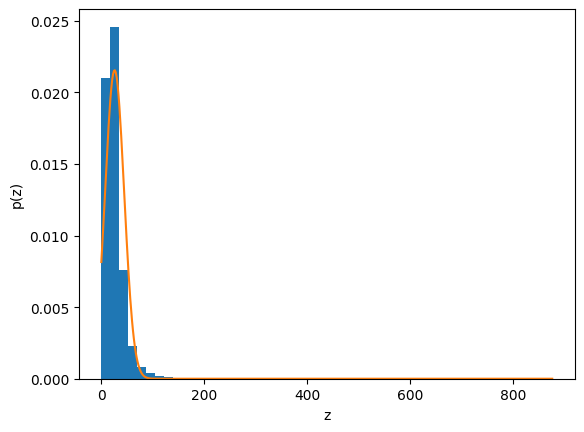

In [15]:
import matplotlib.pyplot as plt

z_vals = np.linspace(min(z), max(z), 500)
pdf = c * np.exp(-lam * (z_vals - mu)**2)

plt.hist(z, bins=50, density=True)
plt.plot(z_vals, pdf)
plt.xlabel("z")
plt.ylabel("p(z)")
plt.show()
